In [26]:
library(tidyr)
library(stringr)

In [3]:
df = read.csv('C:\\Users\\mmo990\\surfdrive\\DOM_Paper\\Data\\dom_gases_poc_doc_ions_h2o_ptrms.csv')


In [4]:
head(df)

site,date,area,t,ph,ec,diss.co2,diss.ch4,diss.n2o,doc,...,ng_C.100,C_nmol.100,H_nmol.100,O_nmol.100,N_nmol.100,osc.100,nC.100,OC.100,HC.100,NC.100
A_P13,17/07/2015,94,12.0,5.927167,24.4,397.05837,4.05430,5.39,16.94504,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A_P14,20/07/2015,34,10.4,5.480000,22.6,114.17092,2.75777,5.88,22.91708,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A_P15,20/07/2015,227,11.2,5.827175,19.9,95.67475,2.42773,7.65,19.02423,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A_P16,20/07/2015,40,14.5,5.080000,24.9,378.60571,11.98573,4.59,17.79540,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A_P17,20/07/2015,19,7.4,5.097300,53.5,637.43741,61.39524,2.17,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A_P18,20/07/2015,27,18.8,6.220000,22.6,76.39471,6.21972,6.53,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
colnames(df)

[1] "site"            "date"            "area"            "t"              
  [5] "ph"              "ec"              "diss.co2"        "diss.ch4"       
  [9] "diss.n2o"        "doc"             "d13c.doc"        "d14c.doc"       
 [13] "a350"            "suva"            "e2.e3"           "s275.295"       
 [17] "s350.400"        "sr"              "Fmax1"           "Fmax2"          
 [21] "Fmax3"           "Fmax4"           "Fmax5"           "Ftot"           
 [25] "X.C1"            "X.C2"            "X.C3"            "X.C4"           
 [29] "X.C5"            "FI"              "Fresh..Index"    "Biol..Index"    
 [33] "HIX"             "poc"             "year"            "wbtype"         
 [37] "Na"              "Mg"              "Al"              "Si"             
 [41] "P"               "S"               "K"               "Ca"             
 [45] "Cr"              "Mn"              "Fe"              "Co"             
 [49] "Ni"              "Cu"              "Zn"              "As"             
 [53] "Sr"              "Mo"              "Cd"              "Ba"             
 [57] "Pb"              "B"               "delta_h"         "delta_o"        
 [61] "X14.002"         "X14.014"         "X15.022"         "X15.993"        
 [65] "X17.002"         "X17.027"         "X18.034"         "X19.014"        
 [69] "X20.024"         "X21.022"         "X26.015"         "X27.01"         
 [73] "X27.022"         "X28.005"         "X28.019"         "X29.013"        
 [77] "X29.037"         "X29.997"         "X31.018"         "X31.988"        
 [81] "X32.996"         "X33.033"         "X33.993"         "X35"            
 [85] "X35.038"         "X36.023"         "X37.027"         "X38.035"        
 [89] "X39.034"         "X40.968"         "X41.037"         "X42.033"        
 [93] "X43.017"         "X44.013"         "X45.033"         "X45.992"        
 [97] "X46.031"         "X47.012"         "X48.012"         "X49.028"        
[101] "X50.002"         "X51.046"         "X51.94"          "X52.018"        
[105] "X53.037"         "X54.033"         "X55.043"         "X55.936"        
[109] "X56.05"          "X57.033"         "X57.068"         "X57.935"        
[113] "X58.03"          "X58.064"         "X59.048"         "X60.044"        
[117] "X61.028"         "X62.027"         "X63.023"         "X63.045"        
[121] "X63.979"         "X64.007"         "X64.046"         "X65.027"        
[125] "X66.032"         "X67.053"         "X68.049"         "X69.034"        
[129] "X69.068"         "X70.031"         "X70.066"         "X71.048"        
[133] "X72.046"         "X73.029"         "X73.061"         "X73.941"        
[137] "X74.029"         "X74.059"         "X75.025"         "X75.04"         
[141] "X75.943"         "X75.995"         "X76.025"         "X76.034"        
[145] "X76.046"         "X77.016"         "X77.048"         "X77.938"        
[149] "X77.999"         "X78.05"          "X78.996"         "X79.045"        
[153] "X80.045"         "X81.039"         "X81.066"         "X82.033"        
[157] "X82.067"         "X83.049"         "X83.082"         "X84.046"        
[161] "X84.082"         "X85.028"         "X85.06"          "X86.025"        
[165] "X86.059"         "X87.043"         "X87.92"          "X88.044"        
[169] "X89.056"         "X89.936"         "X90.024"         "X90.056"        
[173] "X90.946"         "X91.041"         "X91.051"         "X92.02"         
[177] "X92.047"         "X93.038"         "X93.064"         "X93.957"        
[181] "X94.038"         "X94.058"         "X95.046"         "X95.952"        
[185] "X96.046"         "X97.029"         "X97.055"         "X98.027"        
[189] "X99.01"          "X99.042"         "X99.075"         "X100.042"       
[193] "X101.027"        "X101.038"        "X101.937"        "X102.035"       
[197] "X102.052"        "X103.042"        "X103.937"        "X104.048"       
[201] "X105.034"        "X105.046"        "X105.932"        "X106.034"       
[205] "X107.053"        

In [79]:
dom = df[c('site', 'year', 't', 'ph', 'ec','diss.co2', 'diss.ch4' ,'diss.n2o' ,'doc', 'a350', 'suva'
          ,'s275.295', 's350.400', 'sr','Ftot', 'X.C1', 'X.C2', 'X.C3', 'X.C4', 'X.C5', 'FI', 'Fresh..Index', 'HIX', 'wbtype')]

In [66]:
tail(dom)

,site,t,ph,ec,diss.co2,diss.ch4,diss.n2o,doc,a350,suva,...,Ftot,X.C1,X.C2,X.C3,X.C4,X.C5,FI,Fresh..Index,HIX,wbtype
222,C_Field_Blank_3,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Blank
223,C_Field_Blank_4,NA,NA,NA,NA,NA,NA,2.15,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Blank
224,C_S1,NA,NA,NA,NA,NA,NA,0.00,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Snow
225,C_S2,NA,NA,NA,NA,NA,NA,0.00,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Snow
226,C_S3,NA,NA,NA,NA,NA,NA,2.22,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Snow
227,C_S4,NA,NA,NA,NA,NA,NA,8.40,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Snow


In [80]:
dim(dom)

[1] 227  24

In [81]:
dom = dom[complete.cases(dom),]
tail(dom)

,site,year,t,ph,ec,diss.co2,diss.ch4,diss.n2o,doc,a350,...,Ftot,X.C1,X.C2,X.C3,X.C4,X.C5,FI,Fresh..Index,HIX,wbtype
195,C_L31_2,2017,11.0,5.12,11.5,51.17179,0.3588,11.78,6.154133,12.330413,...,1.1640760,24.28409,47.26539,19.26150,8.191144,0.9978741,1.538810,0.4788551,0.9877922,Lake_S
199,C_R2_3,2017,9.3,4.87,16.9,84.47086,0.4801,12.04,8.000633,20.543127,...,1.2989063,27.87996,39.31901,20.30255,11.452957,1.0455191,1.596521,0.4394228,0.9772174,Fluvial
205,C_T5_3,2017,7.7,5.44,17.9,63.21156,0.5125,13.00,9.920967,18.357757,...,1.5770942,25.99080,42.67976,20.73125,10.348077,0.2501128,1.485152,0.4654749,0.9917669,Flood
206,C_L11_TK_2,2017,10.7,7.81,178.6,41.57010,0.5967,12.45,7.276167,6.021243,...,0.8898731,20.84166,40.55389,25.43386,9.722228,3.4483616,1.752603,0.6498071,0.9653172,Lake_T
207,C_L12_2,2017,9.8,8.01,174.0,29.43351,0.4869,12.87,7.179133,6.392873,...,0.8631000,21.49826,43.00724,23.09170,8.990000,3.4128009,1.606614,0.5974570,0.9649985,Lake_T
209,C_L14_2,2017,9.2,7.85,175.3,27.02242,0.3314,12.22,6.584000,5.348648,...,0.7727340,22.02631,42.17882,25.28399,9.615423,0.8954544,1.632547,0.6224540,0.9847309,Lake_T


In [82]:
dim(dom)
rownames(dom) <- dom$site

[1] 47 24

In [83]:
summary(dom)

      site         year            t               ph              ec        
 A_P13  : 1   Min.   :2015   Min.   : 6.90   Min.   :4.380   Min.   : 10.40  
 A_P14  : 1   1st Qu.:2016   1st Qu.:10.45   1st Qu.:5.435   1st Qu.: 17.00  
 A_P15  : 1   Median :2017   Median :12.00   Median :6.000   Median : 24.90  
 A_P16  : 1   Mean   :2017   Mean   :12.00   Mean   :6.099   Mean   : 46.69  
 A_R10  : 1   3rd Qu.:2017   3rd Qu.:13.90   3rd Qu.:6.478   3rd Qu.: 30.35  
 A_R10_2: 1   Max.   :2017   Max.   :16.30   Max.   :8.010   Max.   :205.00  
 (Other):41                                                                  
    diss.co2          diss.ch4           diss.n2o           doc        
 Min.   :  27.02   Min.   :  0.1208   Min.   : 0.950   Min.   : 4.889  
 1st Qu.:  55.53   1st Qu.:  0.4546   1st Qu.: 5.735   1st Qu.: 7.638  
 Median : 114.17   Median :  2.7415   Median : 8.190   Median :15.506  
 Mean   : 240.87   Mean   : 15.2638   Mean   : 8.765   Mean   :18.125  
 3rd Qu.: 375.12

In [84]:
dom = dom %>%
  separate(site, into = c("delete", "site", ''), sep = "_")

Warning message:
"Expected 3 pieces. Additional pieces discarded in 4 rows [15, 17, 39, 45]."Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 17 rows [1, 2, 3, 4, 5, 7, 8, 14, 18, 19, 20, 22, 23, 33, 34, 35, 37]."

In [88]:
head(dom)

,site,year,t,ph,ec,diss.co2,diss.ch4,diss.n2o,doc,a350,...,Ftot,X.C1,X.C2,X.C3,X.C4,X.C5,FI,Fresh..Index,HIX,wbtype
A_P13,P13,2015,12.0,5.927167,24.4,397.05837,4.05430,5.39,16.94504,25.45260,...,20.331640,27.45055,39.29130,18.01872,11.87168,3.367750,1.451769,0.4366282,0.9461802,Pond
A_P14,P14,2015,10.4,5.480000,22.6,114.17092,2.75777,5.88,22.91708,105.68741,...,15.307227,28.54533,38.01698,17.62174,10.84212,4.973840,1.461565,0.4140188,0.9325058,Pond
A_P15,P15,2015,11.2,5.827175,19.9,95.67475,2.42773,7.65,19.02423,42.42955,...,6.586669,28.59321,40.68469,17.42248,11.83950,1.460118,1.366850,0.4181354,0.9747722,Pond
A_P16,P16,2015,14.5,5.080000,24.9,378.60571,11.98573,4.59,17.79540,35.60075,...,5.974770,30.00745,39.33501,17.69684,12.96070,0.000000,1.404705,0.3795153,0.9908152,Pond
A_R10,R10,2015,13.3,6.580566,30.2,72.39431,0.47214,8.28,11.70368,22.11040,...,3.070569,26.59326,39.93991,18.34381,10.72786,4.395157,1.491483,0.4569388,0.9315077,Fluvial
A_R10_2,R10,2015,12.3,6.375000,32.2,68.69276,0.43562,8.19,11.64507,22.97429,...,2.702222,27.34756,39.00796,19.43440,12.13097,2.079110,1.489165,0.4513774,0.9698772,Fluvial


In [85]:
dom = dom[ -c(1,3)]

In [91]:
pcadom = rda(dom[,c(3:23)], scale=TRUE)

In [92]:
summary(pcadom)


Call:
rda(X = dom[, c(3:23)], scale = TRUE) 

Partitioning of correlations:
              Inertia Proportion
Total              21          1
Unconstrained      21          1

Eigenvalues, and their contribution to the correlations 

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6    PC7
Eigenvalue            10.1861 3.6316 1.8249 1.22094 1.07670 0.8610 0.5880
Proportion Explained   0.4851 0.1729 0.0869 0.05814 0.05127 0.0410 0.0280
Cumulative Proportion  0.4851 0.6580 0.7449 0.80303 0.85430 0.8953 0.9233
                          PC8     PC9    PC10    PC11     PC12     PC13
Eigenvalue            0.48479 0.34690 0.25691 0.14993 0.113309 0.097985
Proportion Explained  0.02309 0.01652 0.01223 0.00714 0.005396 0.004666
Cumulative Proportion 0.94639 0.96291 0.97514 0.98228 0.987675 0.992341
                          PC14     PC15     PC16      PC17      PC18      PC19
Eigenvalue            0.070244 0.039458 0.023974 0.0132477 0.0076472 0.00608

In [93]:
b = as.numeric(factor(dom$wbtype))

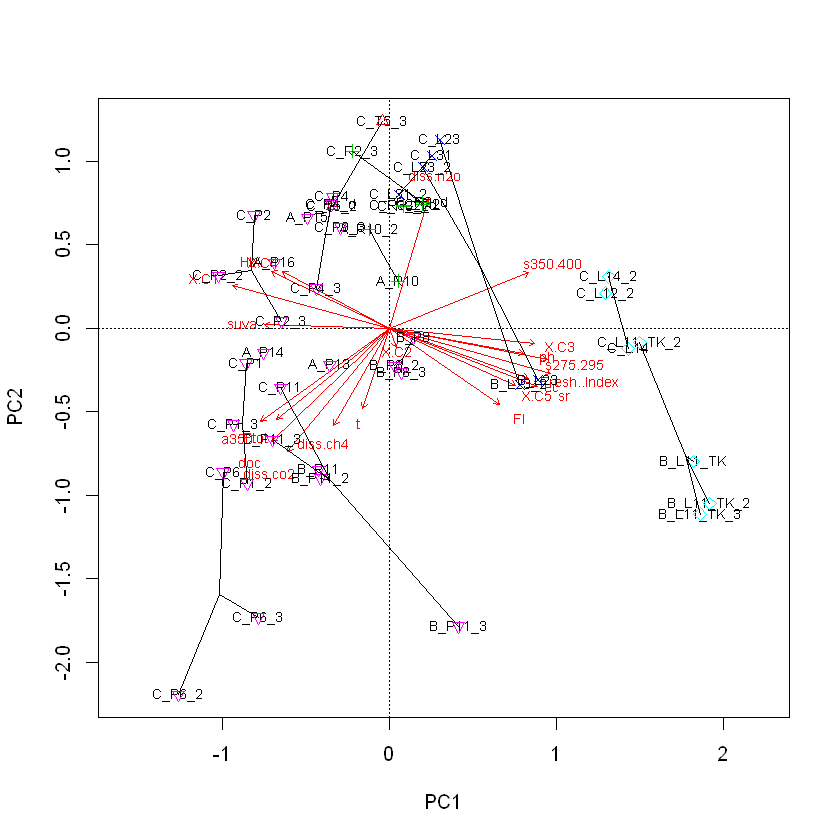

In [124]:
biplot(pcadom)

#ordihull(pcadom, group = dom$wbtype)
points(pcadom, col = as.factor(dom$wbtype), pch=as.numeric(as.factor(dom$wbtype)))
ordispider(pcadom, groups=dom$site)

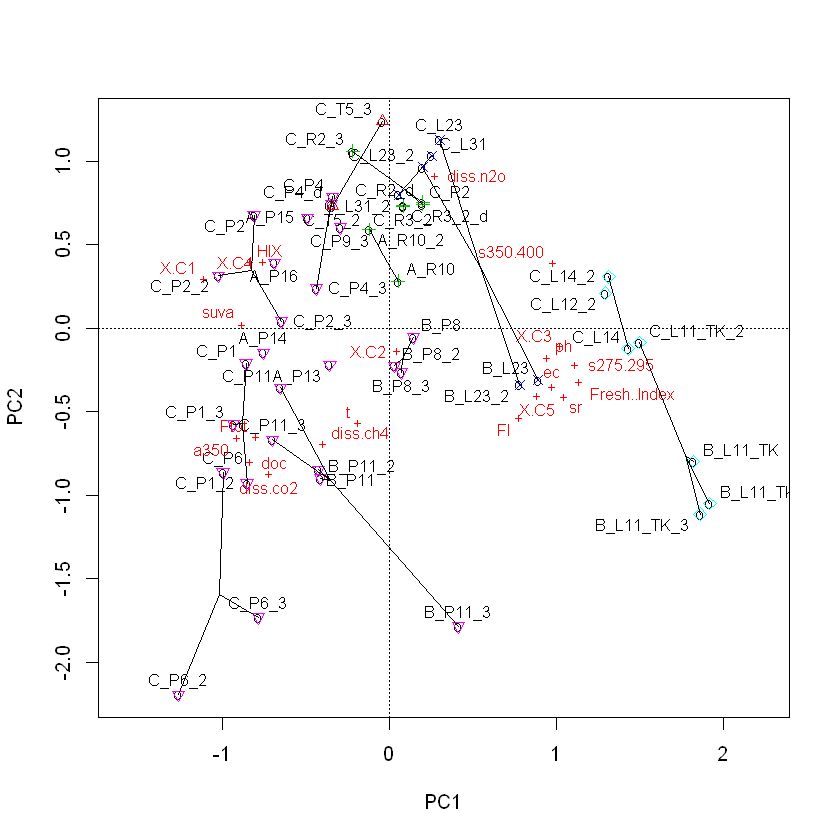

In [120]:
ordipointlabel(pcadom)
points(pcadom, col = as.factor(dom$wbtype), pch=as.numeric(as.factor(dom$wbtype)), bg = as.factor(dom$wbtype))
ordispider(pcadom, groups=dom$site)
#ordiellipse(pcadom, groups=dom$year,   kind = "ehull")

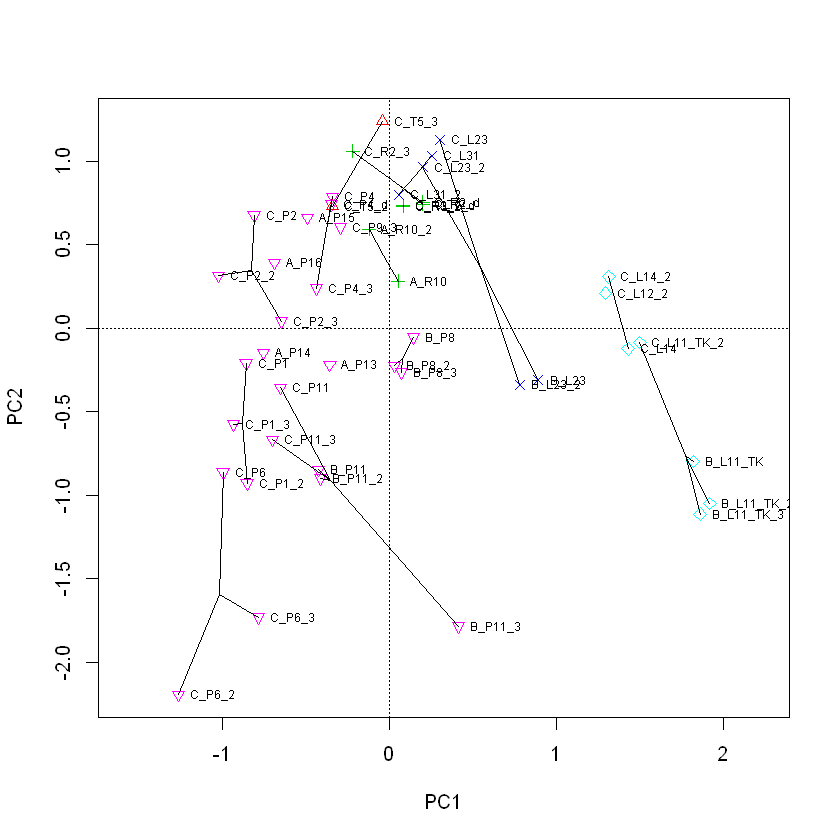

In [139]:
plot(pcadom, disp='sites', type='n')
points(pcadom, col = as.factor(dom$wbtype), pch=as.numeric(as.factor(dom$wbtype)), bg = as.factor(dom$wbtype))
ordispider(pcadom, groups=dom$site)
text(pcadom, display='sites', pos=4, offset=0.5, cex=0.6)